2022.06.21

In [1]:
# from google.colab import drive
# drive.mount('/content/MyDrive')

In [2]:
import pandas as pd
import numpy as np
!pip install stargazer
!pip install tabulate
from tabulate import tabulate
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# !git clone https://github.com/mwburke/stargazer.git
# change stargazer file with tvalues

In [4]:
from stargazer.stargazer import Stargazer

# Data

## etftotal

In [5]:
url = 'https://drive.google.com/uc?id='

etftotal = pd.read_parquet(url + '1LjKMfKn7HYKVvWhS0QWSQjXpBvfeJb2Q&confirm=t')

In [6]:
etfinfo = pd.read_csv(url + '1LlZ6ybHQm25HFJJRYb8nU9smempRiCw-')

In [8]:
etftotal

,etf_code,date,Ticker,holdings_share,won_value,mcap_weight,won_value_sum,wonval_weight
0,A159800,2012-07-05,A005930,138.0,164358000,0.2184,746291800,0.220233
1,A159800,2012-07-05,A005380,193.0,45451500,0.0602,746291800,0.060903
2,A159800,2012-07-05,A005490,93.0,35061000,0.0466,746291800,0.046980
3,A159800,2012-07-05,A000270,330.0,24585000,0.0327,746291800,0.032943
4,A159800,2012-07-05,A012330,85.0,23375000,0.0311,746291800,0.031322
...,...,...,...,...,...,...,...,...
21516,A391680,2022-09-27,A298050,4.0,1378000,0.0039,336027980,0.004101
21517,A391680,2022-09-27,A298020,5.0,1320000,0.0039,336027980,0.003928
21518,A391680,2022-09-27,A000990,31.0,1176450,0.0036,336027980,0.003501
21519,A391680,2022-09-27,A093370,90.0,1138500,0.0033,336027980,0.003388


In [30]:
etfinfo['유형분류(중)'].unique() # ['국내주식형', '국내대체', '국내채권형', '해외주식형', '국내혼합형', 'MMF', '기타형', '해외채권형', '해외대체', '해외혼합형', nan]

array(['인덱스주식', '특별자산', '일반채권', '국가별', '권역별', '대체기타', '회사채권', '채권혼합',
       'MMF', '기타', '국공채권', '섹터별', '지역채권', '부동산', '해외특별자산', '해외채권혼합',
       '해외부동산', '미분류', '해외주식혼합', '액티브주식', '글로벌채권', '주식혼합', '해외자산배분', nan],
      dtype=object)

In [32]:
etf_stockonly = etfinfo[etfinfo['유형분류(대)'] == '국내주식형'].loc[:,['Symbol', '위험등급', '유형분류(중)', '유형분류(소)', '운용사', '설정일']]
etf_stockonly.columns = ['etf_code', 'risk_rank', 'type_mid', 'type_small', 'company', 'init_date']
etftotal = etftotal.merge(etf_stockonly, on =['etf_code'], how= 'left')

etftotal.dropna(subset=['type_mid'], inplace= True)

temp = {'인덱스주식':'index_stock', '액티브주식':'active_stock'}
etftotal['type_mid'] = etftotal['type_mid'].map(temp)
etftotal.drop(['type_small'], axis =1, inplace= True)

etftotal['init_date'] = pd.to_datetime(etftotal['init_date'], format ='%Y%m%d')

In [43]:
# etftotal.to_parquet('etf_total_0629.parquet')

In [44]:
etf_hds_list = etftotal[['etf_code', 'Ticker']].drop_duplicates().reset_index(drop=True) ## etf holdings list
etf_hds_list

,etf_code,Ticker
0,A159800,A005930
1,A159800,A005380
2,A159800,A005490
3,A159800,A000270
4,A159800,A012330
...,...,...
44922,A391680,A008930
44923,A391680,A192820
44924,A391680,A020560
44925,A391680,A009900


In [6]:
stockid = pd.read_parquet(url + '19RIMnEk4Ipvcoa9jt-Toznero9AqZnqB')
stockid.drop("Symbol", axis =1, inplace =True)


In [45]:
 # stock classification
etf_hds_list = etf_hds_list.merge(stockid, on =['Ticker'], how = 'left')
etf_hds_list['구분'].unique()

array(['보통주', nan, 'ETF', '우선주', '인프라펀드', 'REITs', '선박투자회사'], dtype=object)

In [ ]:
etf_total

In [61]:
etf_hds_list2 = etf_hds_list[['etf_code', '구분']].drop_duplicates()
etfhlist3 = etf_hds_list2.groupby(['etf_code'])['구분'].count().reset_index()
synthesized = etfhlist3[etfhlist3['구분']>1][['etf_code']]
synthesized = synthesized.merge(etf_hds_list, on =['etf_code'], how = 'left')
synthesized[synthesized['구분']=='보통주']

,etf_code,Ticker,Name,국제표준코드,종목명 (Full),거래소(시장),최초상장일자,상장일자,상장폐지일자,시장이전일,시장이전내용,거래소 업종구분,구분
0,A105190,A005930,삼성전자,KR7005930003,삼성전자보통주,유가증권시장,1975-06-11,1975-06-11,NaT,NaT,NaT,제조업,보통주
1,A105190,A005380,현대차,KR7005380001,현대자동차보통주,유가증권시장,1974-06-28,1974-06-28,NaT,NaT,NaT,제조업,보통주
2,A105190,A005490,POSCO홀딩스,KR7005490008,포스코홀딩스보통주,유가증권시장,1988-06-10,1988-06-10,NaT,NaT,NaT,제조업,보통주
3,A105190,A012330,현대모비스,KR7012330007,현대모비스보통주,유가증권시장,1989-09-05,1989-09-05,NaT,NaT,NaT,제조업,보통주
4,A105190,A055550,신한지주,KR7055550008,신한금융지주회사보통주,유가증권시장,2001-09-10,2001-09-10,NaT,NaT,NaT,은행업,보통주
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15818,A438740,A066570,LG전자,KR7066570003,LG전자보통주,유가증권시장,2002-04-22,2002-04-22,NaT,NaT,NaT,제조업,보통주
15819,A438740,A126340,비나텍,KR7126340009,비나텍,코스닥,2013-07-01,2020-09-23,NaT,2020-09-23,NaT,제조업,보통주
15820,A438740,A074600,원익QnC,KR7074600008,원익큐엔씨,코스닥,2003-12-10,2003-12-12,NaT,NaT,NaT,제조업,보통주
15822,A438740,A145720,덴티움,KR7145720009,덴티움보통주,유가증권시장,2017-03-15,2017-03-15,NaT,NaT,NaT,제조업,보통주


In [4]:
item_df = pd.read_parquet(url + '1jfS5D5kFcdBEsHZFcT9aP1mat5kN_BKH&confirm=t')
item_df['m_return'] = item_df['return']*item_df['m_weight']

mreturn = item_df.groupby(['date'])['m_return'].sum().reset_index().rename(columns ={'m_return':'mkt_rtn'})
item = item_df.merge(mreturn, on =['date'], how = 'left')

#weight diff == act_idx_day
etftotal = etftotal.merge(item_df, on = ['date', 'Ticker'], how='left')
etftotal['wdiff'] = etftotal['wonval_weight']- etftotal['m_weight']
dailywdiff = etftotal.groupby(['etf_code', 'date'])['wdiff'].sum().reset_index()
dailywdiff.rename(columns = {'wdiff':'act_idx_day'}, inplace =True)

etftotal['month'] =etftotal['date'].dt.to_period('M')
etftotal['quarter'] = etftotal['date'].dt.to_period('Q')
etftotal = etftotal.merge(dailywdiff, on =['etf_code', 'date'], how ='left')
etftotal = etftotal[(etftotal['act_idx_day'] >0)& (etftotal['act_idx_day'] < 1)]

maidx = etftotal.groupby(['etf_code', 'month'])['act_idx_day'].mean().reset_index().rename(columns = {'act_idx_day' :'act_idx_month'})
qaidx = etftotal.groupby(['etf_code', 'quarter'])['act_idx_day'].mean().reset_index().rename(columns = {'act_idx_day' :'act_idx_qt'})
etftotal = etftotal.merge(maidx, on = ['etf_code', 'month'], how = 'left')
etftotal = etftotal.merge(qaidx, on = ['etf_code', 'quarter'], how = 'left')
etftotal = etftotal.merge(mreturn, on =['date'],how = 'left')

In [5]:
item_df = pd.read_parquet(url + '1jfS5D5kFcdBEsHZFcT9aP1mat5kN_BKH&confirm=t')
item_df

,date,Ticker,close,return,volume,won_volume,mkt_cap(mil),shrout,total_mcap,m_weight,mkt_wonvol
0,2011-03-02,A005930,918000.0,-0.0054,322780.0,2.961190e+11,135220791.0,147299337.0,1.183824e+09,0.114224,6.565299e+12
1,2011-03-03,A005930,923000.0,0.0054,362277.0,3.335302e+11,135957288.0,147299337.0,1.208808e+09,0.112472,7.109560e+12
2,2011-03-04,A005930,945000.0,0.0238,371501.0,3.479182e+11,139197873.0,147299337.0,1.230036e+09,0.113166,8.307500e+12
3,2011-03-07,A005930,906000.0,-0.0413,638965.0,5.869512e+11,133453199.0,147299337.0,1.216351e+09,0.109716,6.627386e+12
4,2011-03-08,A005930,899000.0,-0.0077,499287.0,4.507687e+11,132422104.0,147299337.0,1.226706e+09,0.107949,7.442699e+12
...,...,...,...,...,...,...,...,...,...,...,...
21778252,2023-04-24,Q760005,11975.0,0.0000,0.0,0.000000e+00,119750.0,10000000.0,2.506479e+09,0.000048,2.524051e+13
21778253,2023-04-25,Q760005,11965.0,-0.0008,0.0,0.000000e+00,119650.0,10000000.0,2.468850e+09,0.000048,2.915551e+13
21778254,2023-04-26,Q760005,11995.0,0.0025,0.0,0.000000e+00,119950.0,10000000.0,2.462777e+09,0.000049,2.608881e+13
21778255,2023-04-27,Q760005,12090.0,0.0079,0.0,0.000000e+00,120900.0,10000000.0,2.481943e+09,0.000049,2.547345e+13


In [7]:
etftotal[(etftotal['etf_code'] == 'A159800') & (etftotal['date'] == '2012-07-05')].sort_values('Ticker')

,etf_code,date,Ticker,holdings_share,won_value,mcap_weight,won_value_sum,wonval_weight,close,return,...,m_weight,mkt_wonvol,m_return,wdiff,month,quarter,act_idx_day,act_idx_month,act_idx_qt,mkt_rtn
82,A159800,2012-07-05,A000100,12.0,1542000,0.0020,746291800,0.002066,127000.0,-0.0117,...,0.001182,5.760669e+12,-0.000014,0.000885,2012-07,2012Q3,0.266752,0.267376,0.267682,0.000995
97,A159800,2012-07-05,A000120,11.0,889900,0.0012,746291800,0.001192,83700.0,0.0346,...,0.001593,5.760669e+12,0.000055,-0.000401,2012-07,2012Q3,0.266752,0.267376,0.267682,0.000995
90,A159800,2012-07-05,A000150,9.0,1224000,0.0016,746291800,0.001640,135000.0,-0.0074,...,0.002334,5.760669e+12,-0.000017,-0.000694,2012-07,2012Q3,0.266752,0.267376,0.267682,0.000995
50,A159800,2012-07-05,A000210,35.0,3339000,0.0045,746291800,0.004474,96300.0,0.0094,...,0.002796,5.760669e+12,0.000026,0.001678,2012-07,2012Q3,0.266752,0.267376,0.267682,0.000995
33,A159800,2012-07-05,A000240,120.0,5304000,0.0070,746291800,0.007107,43800.0,-0.0090,...,0.005561,5.760669e+12,-0.000050,0.001546,2012-07,2012Q3,0.266752,0.267376,0.267682,0.000995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,A159800,2012-07-05,A090430,4.0,4164000,0.0056,746291800,0.005580,1053000.0,0.0115,...,0.005136,5.760669e+12,0.000059,0.000444,2012-07,2012Q3,0.266752,0.267376,0.267682,0.000995
11,A159800,2012-07-05,A096770,87.0,12832500,0.0171,746291800,0.017195,147500.0,0.0000,...,0.011378,5.760669e+12,0.000000,0.005817,2012-07,2012Q3,0.266752,0.267376,0.267682,0.000995
54,A159800,2012-07-05,A097950,10.0,3090000,0.0042,746291800,0.004140,313000.0,0.0129,...,0.003415,5.760669e+12,0.000044,0.000725,2012-07,2012Q3,0.266752,0.267376,0.267682,0.000995
7,A159800,2012-07-05,A105560,460.0,17457000,0.0231,746291800,0.023392,37550.0,-0.0105,...,0.012103,5.760669e+12,-0.000127,0.011288,2012-07,2012Q3,0.266752,0.267376,0.267682,0.000995


In [9]:
kospi = pd.read_csv(url + '1KS93Flgcb4C5KXeyv8Jx_q-iVLOcb77g&confirm=t')
kospi = kospi[['날짜', '종가']]
kospi.columns  = ['date','close']
kospi['date']= pd.to_datetime(kospi['date'])
kospi.replace(',', "", regex = True, inplace = True)
kospi['kospi_return'] = kospi['close'].astype(float).pct_change()
kospi.drop('close', axis = 1, inplace= True)

In [10]:
etfhds = etftotal[['etf_code', 'date','won_value_sum']].drop_duplicates()

etfhds = etfhds.sort_values(['etf_code', 'date'])
etfhds['etf_holdings_rtn'] = etfhds.groupby(['etf_code'])['won_value_sum'].pct_change()

etfhds = etfhds[['etf_code', 'date','etf_holdings_rtn']]
etfhds = etfhds.merge(mreturn, on =['date'], how = 'left')
etfhds = etfhds.merge(kospi, on =['date'], how = 'left')
etfhds.dropna(inplace =True)

etfhds['quarter'] = etfhds['date'].dt.to_period('Q')
qcounts = etfhds.groupby(['etf_code', 'quarter'])['date'].count().reset_index().rename(columns ={'date':'q_count'})
etfhds = etfhds.merge(qcounts, on =['etf_code' ,'quarter'], how ='left')
etfhds = etfhds[etfhds['q_count'] > 10] ## more than 10 values in one quarter. in the paper, the minimum observation value is 13

etfhds['rtn_diff'] = etfhds['etf_holdings_rtn'] - etfhds['mkt_rtn']

def winsor(pdseries):
  min = pdseries.min()
  p995 = pdseries.quantile(0.995)
  return pdseries.clip(min, p995)

In [11]:
act_rdev = etfhds.groupby(['etf_code', 'quarter'])['rtn_diff'].std().reset_index().rename(columns = {'rtn_diff':'act_rdev'}).dropna()
act_rdev['act_rdev'] = winsor(act_rdev['act_rdev'])
act_rdev['act_rdev_annum'] = act_rdev['act_rdev']*2  ## annualized standard deviation (since act_rdev calculated quarterly, multiply it with square root of 4)

etfhds['rtn_diff2'] = etfhds['etf_holdings_rtn'] - etfhds['kospi_return']
ardev2 = etfhds.groupby(['etf_code', 'quarter'])['rtn_diff2'].std().reset_index().rename(columns = {'rtn_diff2': 'act_rdev2'}).dropna()
act_rdev = act_rdev.merge(ardev2, on =['etf_code', 'quarter'], how = 'left')
act_rdev['act_rdev2'] = winsor(act_rdev['act_rdev2'])
act_rdev['act_rdev2_annum'] = act_rdev['act_rdev2']*2  ## annualized standard deviation (since act_rdev calculated quarterly, multiply it with square root of 4)

etftotal = etftotal.merge(act_rdev, on =['etf_code', 'quarter'], how ='left')
etftotal['year'] = etftotal['date'].dt.to_period('Y')

In [12]:
quarterly = etftotal[['etf_code', 'quarter', 'act_idx_qt', 'act_rdev_annum']]

item_df['quarter'] = item_df['date'].dt.to_period('Q')
wonvolq = item_df.groupby(['quarter', 'Ticker'])['won_volume'].sum().reset_index().rename(columns ={'won_volume':'won_vol_q'})
item_df = item_df.merge(wonvolq, on =['quarter', 'Ticker'], how = 'left')

mktcapmil = item_df.groupby(['quarter', 'Ticker'])['mkt_cap(mil)'].mean().reset_index().rename(columns ={'mkt_cap(mil)' : 'qavg_mcap'}).dropna()
mktcapmil['qavg_mcap'] = mktcapmil['qavg_mcap']*1000000

item_df = item_df.merge(mktcapmil, on =['Ticker', 'quarter'], how='left')
item_df['turnover_q'] = item_df['won_vol_q']/item_df['qavg_mcap']

qtnover = item_df[['Ticker', 'quarter', 'turnover_q']].drop_duplicates()
qtnover = qtnover.dropna()
qtnover.columns = ['etf_code', 'quarter', 'etf_trnover_q']

etftotal = etftotal.merge(qtnover, on =['etf_code', 'quarter'], how = 'left')

## actge

In [13]:
item_df = pd.read_parquet(url + '1jfS5D5kFcdBEsHZFcT9aP1mat5kN_BKH&confirm=t')
item_df['mpf_return'] = (1+item_df['return']) * item_df['m_weight']
## Market Portfolio ; including kse, kosdaq
mpf = item_df.groupby(['date'])['mpf_return'].sum().reset_index()

item_df['year'] = item_df['date'].dt.to_period('Y')
ymcap = item_df.groupby(['year', 'Ticker'])['mkt_cap(mil)'].mean().reset_index().rename(columns ={'mkt_cap(mil)': 'mcap_y'})
ymcap['mcap_y'] = ymcap['mcap_y']*1000000
wonvoly = item_df.groupby(['year', 'Ticker'])['won_volume'].sum().reset_index().rename(columns ={'won_volume': 'wonvol_y'})
turny = pd.merge(wonvoly, ymcap, on =['year', 'Ticker'], how ='left')
turny.dropna(inplace=True)
turny['turnover_year'] = turny['wonvol_y']/turny['mcap_y']

rtns = item_df[['date','Ticker','return']].drop_duplicates()
etfs = etftotal[['date','etf_code']].drop_duplicates()
etfs = etfs.merge(rtns, left_on= ['date', 'etf_code'], right_on = ['date','Ticker'], how= 'left')
etfs = etfs.drop('Ticker', axis = 1)
etfs = etfs.merge(kospi, on=['date'], how = 'left')
etfs['quarter'] = etfs['date'].dt.to_period('Q')
etfs['rtn_diff3'] = etfs['return'] - etfs['kospi_return']
etfs_Rdev = etfs.groupby(['etf_code', 'quarter'])['rtn_diff3'].std().reset_index().rename(columns = {'rtn_diff3': 'act_rdev3'}).dropna()
etfs_Rdev['act_rdev3_annum'] = etfs_Rdev['act_rdev3']*2

tov = turny.groupby(['Ticker'])['turnover_year'].mean().reset_index().rename(columns = {'Ticker' : 'etf_code'})

In [14]:
aum = pd.read_excel(url + '10MgySezGoHfObN5WuCdWX--G1mxCy4Yl')
# aum = pd.read_excel('/content/MyDrive/MyDrive/JaehoKim/verupdate/etf_aum.xlsx')
aum = aum.melt(id_vars= ['date'])
aum.columns = ['date', 'etf_code', 'etf_AUM']
aum['date'] = pd.to_datetime(aum['date'])
etfaum = aum.groupby(['etf_code'])['etf_AUM'].mean().reset_index().dropna()
aum['year'] = aum['date'].dt.to_period('Y')
year_aum = aum.groupby(['etf_code', 'year'])['etf_AUM'].mean().reset_index().dropna()


etftotal = etftotal.merge(etfs_Rdev, on=['etf_code', 'quarter'], how='left')
actge = etftotal.groupby(['etf_code', 'date'])[['act_idx_qt', 'act_rdev3_annum']].mean().reset_index().dropna()
actge = actge.merge(tov, on=['etf_code'])
actge = actge.merge(etfaum, on=['etf_code'], how='left')
actge['tover_Q'] = pd.qcut(actge['turnover_year'], 4, labels=False)
actge['AUM_Q'] = pd.qcut(actge['etf_AUM'], 4, labels=False)
actge['Date_Q'] = pd.qcut(actge['date'],4, labels=False)
#actge['Date_Q'] = pd.to_datetime(actge['date']).dt.quarter
actge['act_idx_qt'] = actge['act_idx_qt'] * 100
actge['act_rdev3_annum'] = actge['act_rdev3_annum'] * 100

In [15]:
etf_infog = pd.read_csv(url + '14XJVo8GZ_mQlhaTya1K_Jsep4cJXq9qM')
# etf_infog = pd.read_csv('/content/MyDrive/MyDrive/JaehoKim/verupdate/etf_fee0508.csv')
etf_infog.columns = ['etf_code', 'issuer', 'fee']
issuer = etf_infog['issuer'].drop_duplicates().reset_index(drop=True)
issuer = issuer.reset_index()
issuer.columns = ['issuer_id', 'issuer']
etf_infog = etf_infog.merge(issuer, on =['issuer'], how = 'left')
actge = actge.merge(etf_infog[['etf_code', 'fee', 'issuer_id']], how = 'left')

In [16]:
etftotal.columns

Index(['etf_code', 'date', 'Ticker', 'holdings_share', 'won_value',
       'mcap_weight', 'won_value_sum', 'wonval_weight', 'close', 'return',
       'volume', 'won_volume', 'mkt_cap(mil)', 'shrout', 'total_mcap',
       'm_weight', 'mkt_wonvol', 'm_return', 'wdiff', 'month', 'quarter',
       'act_idx_day', 'act_idx_month', 'act_idx_qt', 'mkt_rtn', 'act_rdev',
       'act_rdev_annum', 'act_rdev2', 'act_rdev2_annum', 'year',
       'etf_trnover_q', 'act_rdev3', 'act_rdev3_annum'],
      dtype='object')

In [17]:
actge.columns

Index(['etf_code', 'date', 'act_idx_qt', 'act_rdev3_annum', 'turnover_year',
       'etf_AUM', 'tover_Q', 'AUM_Q', 'Date_Q', 'fee', 'issuer_id'],
      dtype='object')

## etfmcap

In [18]:
etfmcap = pd.read_parquet(url + '1onqpUFYNgywxlOutMZp2ew7xInJ89l41')
# etfmcap = pd.read_parquet('/content/MyDrive/MyDrive/JaehoKim/verupdate/etf_mcap.parquet')
etfmcap['month']= etfmcap['date'].dt.to_period('M')
etfmcap.sort_values(['etf_code', 'month'], inplace= True)
etfmcap_m = etfmcap.groupby(['etf_code', 'month'])['shrout'].mean().reset_index()
etfmcap_m.sort_values(['etf_code', 'month'], inplace= True)
etfmcap_m['shr_flow'] = etfmcap_m.groupby(['etf_code'])['shrout'].pct_change()

rtns =item_df[['date','Ticker', 'return']].drop_duplicates()
rtns['month'] = rtns['date'].dt.to_period('M')
rtns['log_rtn'] = np.log(1+ rtns['return'])
rtns = rtns.groupby(['Ticker', 'month'])['log_rtn'].sum().reset_index()
rtns['monthly_rtn'] = np.exp(rtns['log_rtn']) -1
rtns = rtns.loc[:, ['Ticker', 'month', 'monthly_rtn']]
rtns.rename(columns = {'Ticker' : 'etf_code'}, inplace =True)


etfs_listin = etftotal[['etf_code', 'date']].drop_duplicates()
etfs_listin['month'] = etfs_listin['date'].dt.to_period('M')
etfs_listin = etfs_listin.drop('date', axis = 1)
etfs_listin = etfs_listin.drop_duplicates()

etfmcap_m = etfs_listin.merge(etfmcap_m, on =['etf_code', 'month'], how = 'left')

etfcin = etfs_listin[['etf_code']].drop_duplicates().reset_index(drop=True)
etfcin['in'] =1
etfmrtn = rtns.merge(etfcin, on = ['etf_code'], how = 'left').dropna(subset=['in'])
etfmrtn['perf_rank'] = etfmrtn.groupby(['month'])['monthly_rtn'].rank(pct= True)
etfmrtn = etfmrtn.drop('in', axis = 1)
etfmrtn['month'] = etfmrtn['month'] +pd.offsets.MonthEnd()
etfmcap_m = etfmcap_m.merge(etfmrtn, on =['etf_code', 'month'], how = 'left')
etfmcap_m['shr_flow'] = etfmcap_m['shr_flow'].clip(-0.5, 1)
etfmcap_m['pct_flow'] = etfmcap_m['shr_flow']*100

## ptover

In [19]:
pchange_tot = pd.read_parquet(url + '14dmvo7JNez6Co7-YFicDOPboDJT7MrKC')
# pchange_tot = pd.read_parquet('/content/MyDrive/MyDrive/JaehoKim/verupdate/daily_ptover.parquet')
pchange_tot['month'] = pchange_tot['date'].dt.to_period('M')
mon_ptover = pchange_tot.groupby(['etf_code', 'month','sign'])['tot_wondiff'].sum().reset_index()
mon_ptover['tot_wondiff'] = mon_ptover['tot_wondiff'].abs()
mon_ptover = mon_ptover.groupby(['etf_code', 'month'])['tot_wondiff'].min().reset_index()

dnav1 = etftotal[['etf_code', 'date', 'won_value_sum']].drop_duplicates()
dnav1['month'] = dnav1['date'].dt.to_period('M')
dnav1 = dnav1.groupby(['etf_code', 'month'])['won_value_sum'].mean().reset_index().rename(columns = {'won_value_sum':'monthly_nav'})
mon_ptover = mon_ptover.merge(dnav1, on =['etf_code', 'month'], how = 'left')

mon_ptover['mon_ptf_tover'] = mon_ptover['tot_wondiff']/mon_ptover['monthly_nav']
mtoptover = mon_ptover.groupby(['month'])['mon_ptf_tover'].quantile(0.75).reset_index().rename(columns = {'mon_ptf_tover':'tover_topq'})
mon_ptover = mon_ptover.merge(mtoptover, on =['month'], how ='left')

mon_ptover['AIF_month'] = mon_ptover['mon_ptf_tover'] >= mon_ptover['tover_topq']
mon_ptover['AIF_month'] = mon_ptover['AIF_month'].astype(int)

## flow_perf_sensitivity

In [20]:
from numpy.linalg import inv
etf_clist = etfmcap_m['etf_code'].drop_duplicates().tolist()
perfsen = {}
for code in etf_clist:
  se = etfmcap_m[etfmcap_m['etf_code'] == code].sort_values('month')
  se = se.dropna()
  if se.shape[0] > 1:
    y = se[['shr_flow']].values
    X = np.ones((y.shape[0], 2))
    X[:, 1] =se['perf_rank'].values
    denom = X.T.dot(X)
    coef = inv(denom)@(X.T.dot(y))
    coef = coef[1][0]
    perfsen[code] = coef
perf_sen = pd.DataFrame(perfsen, index = ['perf_sens']).T.reset_index()
perf_sen.columns = ['etf_code', 'perf_sens']

In [21]:
actge['act_idx'] = actge['act_idx_qt']/100
actge['logit_actidx'] = np.log(actge['act_idx']) - np.log(1-actge['act_idx'])
actge['size'] = np.log(actge['etf_AUM'])
actge['tover'] = np.log(actge['turnover_year'])
actge = actge.merge(perf_sen, on =['etf_code'],how = 'left')

In [22]:
def act_classify(value):
  if value < 0.25 :
    return 'vp'
  elif value < 0.5:
    return 'p'
  elif value < 0.75:
    return 'a'
  else :
    return 'va'
actge['act_category'] = actge['act_idx'].apply(lambda x : act_classify(x))

In [23]:
ia_id = actge[['issuer_id', 'act_category']].drop_duplicates().reset_index(drop=True)
ia_id = ia_id.reset_index()
ia_id.columns =['is_a_idx', 'issuer_id', 'act_category']
actge = actge.merge(ia_id, on =['issuer_id', 'act_category'], how = 'left')
actge.dropna(inplace = True)

In [24]:
actge

,etf_code,date,act_idx_qt,act_rdev3_annum,turnover_year,etf_AUM,tover_Q,AUM_Q,Date_Q,fee,issuer_id,act_idx,logit_actidx,size,tover,perf_sens,act_category,is_a_idx
0,A069500,2011-09-01,23.548688,8.788008,9.120912,4.972247e+12,3,3.0,0,0.16,11,0.235487,-1.177584,29.234893,2.210570,-0.009756,vp,0
1,A069500,2011-09-02,23.548688,8.788008,9.120912,4.972247e+12,3,3.0,0,0.16,11,0.235487,-1.177584,29.234893,2.210570,-0.009756,vp,0
2,A069500,2011-09-05,23.548688,8.788008,9.120912,4.972247e+12,3,3.0,0,0.16,11,0.235487,-1.177584,29.234893,2.210570,-0.009756,vp,0
3,A069500,2011-09-06,23.548688,8.788008,9.120912,4.972247e+12,3,3.0,0,0.16,11,0.235487,-1.177584,29.234893,2.210570,-0.009756,vp,0
4,A069500,2011-09-07,23.548688,8.788008,9.120912,4.972247e+12,3,3.0,0,0.16,11,0.235487,-1.177584,29.234893,2.210570,-0.009756,vp,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344608,A436180,2022-09-21,94.163044,3.518127,0.234527,7.869071e+09,0,0.0,3,0.53,1,0.941630,2.780818,22.786206,-1.450184,-0.269121,va,29
344609,A436180,2022-09-22,94.163044,3.518127,0.234527,7.869071e+09,0,0.0,3,0.53,1,0.941630,2.780818,22.786206,-1.450184,-0.269121,va,29
344610,A436180,2022-09-23,94.163044,3.518127,0.234527,7.869071e+09,0,0.0,3,0.53,1,0.941630,2.780818,22.786206,-1.450184,-0.269121,va,29
344611,A436180,2022-09-26,94.163044,3.518127,0.234527,7.869071e+09,0,0.0,3,0.53,1,0.941630,2.780818,22.786206,-1.450184,-0.269121,va,29


In [25]:
actge.columns

Index(['etf_code', 'date', 'act_idx_qt', 'act_rdev3_annum', 'turnover_year',
       'etf_AUM', 'tover_Q', 'AUM_Q', 'Date_Q', 'fee', 'issuer_id', 'act_idx',
       'logit_actidx', 'size', 'tover', 'perf_sens', 'act_category',
       'is_a_idx'],
      dtype='object')

# Table 1

In [26]:
cols = ['mean', '25%', '50%', '75%']
act = ['act_idx_qt', 'act_rdev3_annum']
t1_sst = []
for ac in act:
  pooled = actge[ac].describe().to_frame().T
  pooled = pooled.loc[:, cols]
  bc = ['tover_Q', 'AUM_Q', 'Date_Q']  # 'Date_Q'를 그룹에 추가합니다.
  pooled.index = ['pooled']
  panelbc = []
  for bc0 in bc:
    panb = actge.groupby(bc0)[ac].describe()
    panb = panb.loc[:, cols]
    panb.index = [bc0 + str(int(x+1)) for x in panb.index]
    panelbc.append(panb)
  panelbc = pd.concat(panelbc)
  panelbc = pd.concat([pooled, panelbc]).T.reset_index()
  panelbc['Group'] = ac
  panelbc = panelbc.set_index(['Group', 'index']).T
  t1_sst.append(panelbc)
t1_sst = pd.concat(t1_sst, axis=1)
t1_sst

Group    act_idx_qt                                  act_rdev3_annum  \
index          mean        25%        50%        75%            mean   
pooled    68.865188  37.352446  76.894951  94.609922        3.224397   
tover_Q1  54.012934  30.844717  55.923008  74.178281        3.005293   
tover_Q2  67.100060  43.576710  72.536590  92.115703        3.037691   
tover_Q3  73.047226  33.597598  88.658650  95.847057        3.270566   
tover_Q4  81.573531  85.275759  94.825002  97.878786        3.591144   
AUM_Q1    78.911020  62.664865  92.836608  97.195957        3.355068   
AUM_Q2    68.558999  41.824388  74.350512  94.256169        3.146525   
AUM_Q3    69.912445  41.318569  76.894951  94.803695        3.218046   
AUM_Q4    57.988204  28.849074  64.138248  90.526994        3.176950   
Date_Q1   69.225784  36.109598  80.355756  94.799879        2.790573   
Date_Q2   69.718865  39.582168  76.811281  95.149699        2.640772   
Date_Q3   67.019362  35.261988  72.456172  94.495566        4.107442   
Date_Q4   69.495994  43.445464  76.231635  94.235244        3.359501   

Group                                   
index          25%       50%       75%  
pooled    2.310394  2.998800  3.712050  
tover_Q1  2.160516  2.772694  3.456307  
tover_Q2  2.219038  2.798114  3.454850  
tover_Q3  2.405831  3.053678  3.754332  
tover_Q4  2.652526  3.332929  4.219737  
AUM_Q1    2.429078  3.135999  3.852792  
AUM_Q2    2.237869  2.926121  3.616122  
AUM_Q3    2.327622  3.009305  3.708137  
AUM_Q4    2.284912  2.954524  3.625021  
Date_Q1   2.089423  2.494421  3.182608  
Date_Q2   2.081059  2.446414  3.044505  
Date_Q3   2.946124  3.719293  4.466845  
Date_Q4   2.913964  3.308291  3.752743

In [27]:
#임시로 용량 줄이기 위해. 나중에 없앨것
# actge = actge.groupby(['etf_code']).mean().reset_index().dropna()

# 용량 줄이기 방법2
# actge['year'] = actge['date'].dt.year
# actge['month'] = actge['date'].dt.month
# actge = actge.groupby(['etf_code', 'year', 'month']).mean().reset_index().dropna()

In [32]:
actge_cs = actge.groupby(['etf_code']).mean().reset_index().dropna()


<ipython-input-32-3ed2e446f6a7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  actge_cs = actge.groupby(['etf_code']).mean().reset_index().dropna()


# Table2

In [ ]:
import statsmodels.formula.api as smf
xvar = ["size", "fee", "size+fee", "tover", "perf_sens", "size+fee+tover+perf_sens"]
reg1= []
reg2= []
reg3= []
reg4= []
for x in xvar :
  yvar = "logit_actidx ~ "
  formula = yvar + x
  #simple ols
  model = smf.ols(formula, data = actge_cs).fit(use_t=True)
  reg1.append(model)
  #one way cluster
  #issuer
  model = smf.ols(formula, data = actge_cs).fit(cov_type='cluster', cov_kwds={'groups': actge['issuer_id']}, use_t=True)
  reg2.append(model)

  #activeness category
  model = smf.ols(formula, data = actge_cs).fit(cov_type='cluster', cov_kwds={'groups': actge['act_category']}, use_t=True)
  reg3.append(model)

  #double cluster: issuer, activness index category

  model = smf.ols(formula, data = actge_cs).fit(cov_type='cluster', cov_kwds={'groups': actge['is_a_idx']}, use_t=True)
  reg4.append(model)

In [31]:
### Table1,double clustering with management company and activeness category
stg = Stargazer(reg1)
stg.covariate_order(['Intercept', 'size', 'fee', 'tover', 'perf_sens'])
stg

In [ ]:
# Iterate over each model in reg4
for i, model in enumerate(reg4):
    # Get the t-values for each parameter
    t_values = model.tvalues

    # Print the t-values for the current model
    print(f"Model {i+1}:")
    print(t_values)
    print()

Model 1:
Intercept    7.322652
size        -7.459925
dtype: float64

Model 2:
Intercept   -2.091795
fee          5.189529
dtype: float64

Model 3:
Intercept    1.250276
size        -1.727832
fee          4.093860
dtype: float64

Model 4:
Intercept    3.050585
tover        4.600421
dtype: float64

Model 5:
Intercept    2.586739
perf_sens    3.381185
dtype: float64

Model 6:
Intercept    2.959805
size        -3.689190
fee          4.179070
tover        6.533561
perf_sens    3.456424
dtype: float64



# Figure 5

In [ ]:
actge_forplot = actge.groupby(['etf_code']).mean().reset_index().dropna()

<ipython-input-107-2cf115902fe3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  actge_forplot = actge.groupby(['etf_code']).mean().reset_index().dropna()


Text(33.37500000000001, 0.5, 'Size: ln(AUM)')

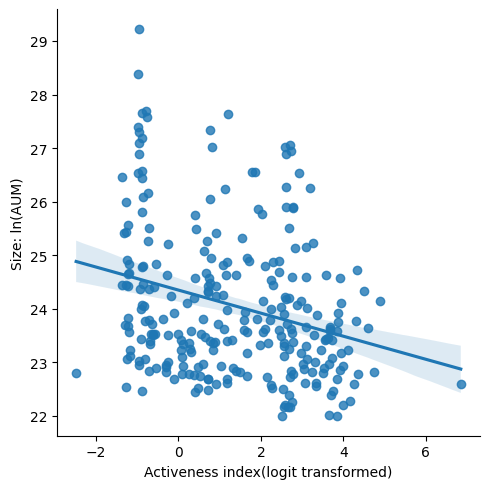

In [ ]:
sns.lmplot(data=actge_forplot, x="logit_actidx", y="size")
plt.xlabel('Activeness index(logit transformed)')
plt.ylabel('Size: ln(AUM)')
#plt.savefig('figure5-1.png')

Text(29.000000000000007, 0.5, 'Management Fee(%)')

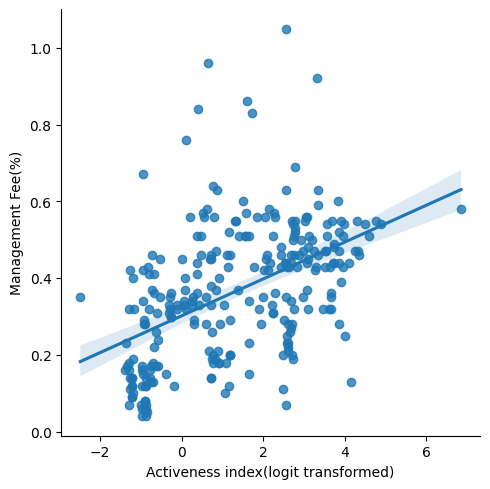

In [ ]:
sns.lmplot(data=actge_forplot, x="logit_actidx", y="fee")
plt.xlabel('Activeness index(logit transformed)')
plt.ylabel('Management Fee(%)')
#plt.savefig('figure5-2.png')

# Table 3

In [ ]:
ptover = pd.read_parquet(url + '1qc_Yw0XBTvYEcac3QEPk2MrbjzdsMwSG')
ptover2 = ptover.groupby(['etf_code'])['ptf_tover'].mean().reset_index()
topval = ptover2['ptf_tover'].quantile(0.75)
ptover2['AIF_dummy'] = ptover2['ptf_tover'] >= topval
ptover2['AIF_dummy'] = ptover2['AIF_dummy'].astype(int)
actge = actge.merge(ptover2, on =['etf_code'], how = 'left')
etflistd = etftotal[['etf_code', 'date', 'won_value_sum']].drop_duplicates()
etflistd = etflistd.reset_index(drop=True)

In [ ]:
etfmcap2 = pd.read_parquet(url + '1onqpUFYNgywxlOutMZp2ew7xInJ89l41')
etfmcap2 = etflistd.merge(etfmcap2, on =['etf_code', 'date'], how = 'left')
etfmcap2 = etfmcap2.sort_values(['etf_code','date'])

# #아래 두줄 추가해봄
etfmcap2['year'] = etfmcap2['date'].dt.year
etfmcap2['year'] = pd.PeriodIndex(etfmcap2['year'], freq='A-DEC')
etfmcap2 = etfmcap2.merge(ptover, on=['etf_code', 'year'], how='left')
# etfmcap2 = etfmcap2.merge(ptover, on =['etf_code', 'date'], how = 'left')

repl ={'va':1, 'a':1, 'p':0, 'vp':0}
actge['Active_dummy'] = actge['act_category'].replace(repl)
dummies = actge[['etf_code', 'AIF_dummy', 'Active_dummy']].fillna(0)

etfmcap_m = etfmcap_m.merge(dummies, on =['etf_code'],how ='left')
etfmcap_m = etfmcap_m.reset_index()
etfmcap_m.dropna(inplace= True)
etfmcap_m['shr_flow'] =  etfmcap_m['shr_flow'].clip(-0.5, 1) ## winsorize
etfmcap_m['pct_flow'] = etfmcap_m['shr_flow']*100

In [ ]:
y = 'pct_flow ~'
xlist = ['perf_rank', 'perf_rank*Active_dummy', 'perf_rank + perf_rank*Active_dummy + perf_rank * AIF_dummy' ]
t3= []
for x in xlist:
  fml = y + x
  model = smf.ols(fml, data = etfmcap_m).fit(cov_type='cluster', cov_kwds={'groups': etfmcap_m['index']}, use_t=True)
  t3.append(model)

In [ ]:
act_sample = etfmcap_m[etfmcap_m['Active_dummy'] ==1]
formula = 'pct_flow ~ perf_rank*AIF_dummy'
mod5 = smf.ols(formula, data = act_sample).fit(cov_type='cluster', cov_kwds={'groups': act_sample['index']}, use_t=True)

In [ ]:
import statsmodels.api as sm
import patsy

## Fixed Effec regression with clustered standard errors
def FE_reg(formula,data=None,absorb=None,cluster=None):
    y,X = patsy.dmatrices(formula,data,return_type='dataframe')

    ybar = y.mean()
    y = y -  y.groupby(data[absorb]).transform('mean') + ybar

    Xbar = X.mean()
    X = X - X.groupby(data[absorb]).transform('mean') + Xbar

    reg = sm.OLS(y,X)
    # Account for df loss from FE transform
    reg.df_resid -= (data[absorb].nunique() - 1)
    if cluster :
      mod =reg.fit(cov_type='cluster',cov_kwds={'groups':data[cluster].values})
    else :
      mod = reg.fit()
    return mod
formula = 'pct_flow ~ perf_rank'
model1 = FE_reg(formula,data=etfmcap_m, absorb='etf_code', cluster ='index')
model2 = FE_reg(formula,data=etfmcap_m, absorb='month', cluster ='index')

In [ ]:
tab3= []
tab3.append(t3[0])
tab3.append(model1)
tab3.append(model2)
tab3.append(t3[1])
tab3.append(mod5)
tab3.append(t3[2])

In [ ]:
stg_t3 = Stargazer(tab3)
stg_t3.covariate_order(['Intercept' ,'perf_rank', 'perf_rank:Active_dummy', 'Active_dummy', 'perf_rank:AIF_dummy', 'AIF_dummy'])
stg_t3.add_line('Fund fixed effects', ['', 'Yes', '', '', '', ''])
stg_t3.add_line('Time fixed effects', ['', '', 'Yes', '', '', ''])
stg_t3.add_line('Sample', ['Pooled', 'Pooled', 'Pooled', 'Pooled', 'Active', 'Pooled'])
stg_t3

In [ ]:
# Iterate over each model in reg4
for i, model in enumerate(tab3):
    # Get the t-values for each parameter
    t_value2 = model.tvalues

    # Print the t-values for the current model
    print(f"Model {i+1}:")
    print(t_value2)
    print()

Model 1:
Intercept     40.376457
perf_rank    257.035261
dtype: float64

Model 2:
Intercept     21.620920
perf_rank    277.026316
dtype: float64

Model 3:
Intercept     -3.640090
perf_rank    255.376108
dtype: float64

Model 4:
Intercept                  33.090437
perf_rank                   3.140794
Active_dummy               -1.073272
perf_rank:Active_dummy    160.211291
dtype: float64

Model 5:
Intercept               86.789086
perf_rank              237.522366
AIF_dummy              -90.205363
perf_rank:AIF_dummy     22.824891
dtype: float64

Model 6:
Intercept                  44.186127
perf_rank                  -1.057914
Active_dummy               14.127843
perf_rank:Active_dummy    152.674271
AIF_dummy                -102.403503
perf_rank:AIF_dummy        34.458132
dtype: float64



# Figure6

In [ ]:
from sklearn.cluster import KMeans
kmeansdf = actge[['etf_code', 'perf_sens', 'ptf_tover', 'Active_dummy']].dropna()
kmeansdf = kmeansdf[kmeansdf['Active_dummy'] ==1]
u = kmeansdf['ptf_tover'].quantile(0.99)
kmeansdf['ptf_tover'] = kmeansdf['ptf_tover'].clip(0, u)
kmeansdf.drop('Active_dummy', axis = 1, inplace= True)
kmeansdf = kmeansdf.set_index('etf_code')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


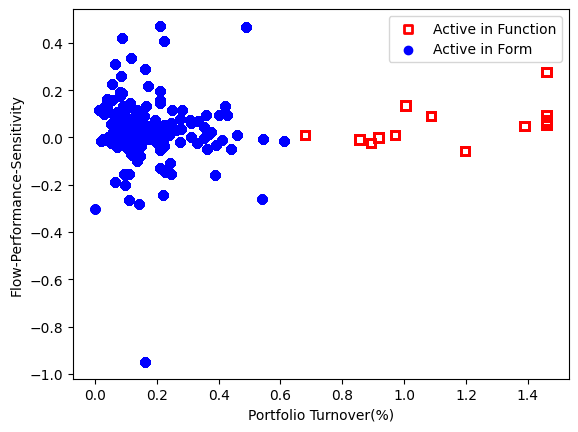

In [ ]:
Kmean = KMeans(n_clusters=2)
Kmean.fit(kmeansdf)
kmeansdf["clusters"] = Kmean.labels_

fig, ax = plt.subplots()

for cluster in set(Kmean.labels_):
    cluster_data = kmeansdf[kmeansdf["clusters"] == cluster]
    if cluster == 0:
        ax.scatter(x='ptf_tover', y='perf_sens', data=cluster_data, marker='s', color='red', facecolor='none', linewidth=2, label='Active in Function')
    else:
        ax.scatter(x='ptf_tover', y='perf_sens', data=cluster_data, marker='o', color='blue', label='Active in Form')

plt.xlabel("Portfolio Turnover(%)")
plt.ylabel("Flow-Performance-Sensitivity")
plt.legend()

plt.savefig('figure6.png')
plt.show()

# Figure 8

In [ ]:
fig8df = etftotal.groupby(['etf_code', 'year'])['act_idx_qt', 'act_rdev3_annum'].mean().reset_index()
fig8df = fig8df.merge(year_aum,on =['etf_code', 'year'], how = 'left')

<ipython-input-120-a065db4bdb30>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fig8df = etftotal.groupby(['etf_code', 'year'])['act_idx_qt', 'act_rdev3_annum'].mean().reset_index()


In [ ]:
def size_class(val):
  bil = 10**9
  if val < bil :
    return '< 1bil'
  elif val < 150 * bil:
    return '> 1bil'
  elif val < 250*bil:
    return '> 150bil'
  else :
    return '> 250bil'
fig8df['size'] = fig8df['etf_AUM'].apply(lambda x : size_class(x))

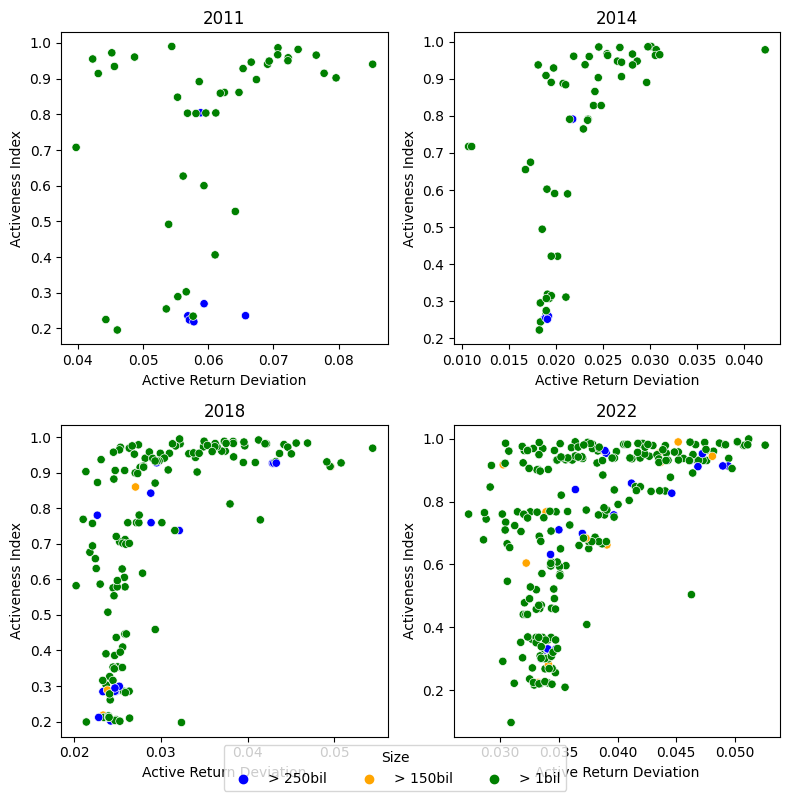

In [ ]:
def size_class(val):
    bil = 10**9
    if val < bil:
        return '< 1bil'
    elif val < 150 * bil:
        return '> 1bil'
    elif val < 250 * bil:
        return '> 150bil'
    else:
        return '> 250bil'

fig8df['size'] = fig8df['etf_AUM'].apply(lambda x: size_class(x))

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

sns.scatterplot(x='act_rdev3_annum', y='act_idx_qt', data=fig8df[fig8df['year'] == '2011'], hue='size', style='size',
                markers={'< 1bil': 'o', '> 1bil': 'o', '> 150bil': 'o', '> 250bil': 'o'},
                palette={'< 1bil': 'black', '> 1bil': 'green', '> 150bil': 'orange', '> 250bil': 'blue'},
                ax=axes[0, 0])
axes[0, 0].set_title('2011')
axes[0, 0].set_xlabel('Active Return Deviation')
axes[0, 0].set_ylabel('Activeness Index')
axes[0, 0].legend().remove()

sns.scatterplot(x='act_rdev3_annum', y='act_idx_qt', data=fig8df[fig8df['year'] == '2014'], hue='size', style='size',
                markers={'< 1bil': 'o', '> 1bil': 'o', '> 150bil': 'o', '> 250bil': 'o'},
                palette={'< 1bil': 'black', '> 1bil': 'green', '> 150bil': 'orange', '> 250bil': 'blue'},
                ax=axes[0, 1])
axes[0, 1].set_title('2014')
axes[0, 1].set_xlabel('Active Return Deviation')
axes[0, 1].set_ylabel('Activeness Index')
axes[0, 1].legend().remove()

sns.scatterplot(x='act_rdev3_annum', y='act_idx_qt', data=fig8df[fig8df['year'] == '2018'], hue='size', style='size',
                markers={'< 1bil': 'o', '> 1bil': 'o', '> 150bil': 'o', '> 250bil': 'o'},
                palette={'< 1bil': 'black', '> 1bil': 'green', '> 150bil': 'orange', '> 250bil': 'blue'},
                ax=axes[1, 0])
axes[1, 0].set_title('2018')
axes[1, 0].set_xlabel('Active Return Deviation')
axes[1, 0].set_ylabel('Activeness Index')
axes[1, 0].legend().remove()

sns.scatterplot(x='act_rdev3_annum', y='act_idx_qt', data=fig8df[fig8df['year'] == '2022'], hue='size', style='size',
                markers={'< 1bil': 'o', '> 1bil': 'o', '> 150bil': 'o', '> 250bil': 'o'},
                palette={'< 1bil': 'black', '> 1bil': 'green', '> 150bil': 'orange', '> 250bil': 'blue'},
                ax=axes[1, 1])
axes[1, 1].set_title('2022')
axes[1, 1].set_xlabel('Active Return Deviation')
axes[1, 1].set_ylabel('Activeness Index')
axes[1, 1].legend().remove()

fig.legend(handles=axes[1, 1].get_legend_handles_labels()[0],
           labels=axes[1, 1].get_legend_handles_labels()[1],
           loc='lower center', ncol=4, title='Size')

fig.tight_layout()
#plt.savefig('figure8.png')

# Figure9

In [ ]:
import matplotlib.pyplot as plt

mon_aidx = etftotal[['month', 'etf_code', 'act_idx_month']].drop_duplicates()
aidx90 = mon_aidx.groupby('month')['act_idx_month'].quantile(0.9).reset_index().rename(columns={'act_idx_month': '90th percentile'}).set_index('month')
aidx75 = mon_aidx.groupby('month')['act_idx_month'].quantile(0.75).reset_index().rename(columns={'act_idx_month': '75th percentile'}).set_index('month')
aidx50 = mon_aidx.groupby('month')['act_idx_month'].quantile(0.5).reset_index().rename(columns={'act_idx_month': '50th percentile'}).set_index('month')
aidx25 = mon_aidx.groupby('month')['act_idx_month'].quantile(0.25).reset_index().rename(columns={'act_idx_month': '25th percentile'}).set_index('month')
aidx10 = mon_aidx.groupby('month')['act_idx_month'].quantile(0.1).reset_index().rename(columns={'act_idx_month': '10th percentile'}).set_index('month')

perc_list = pd.concat([aidx90, aidx75, aidx50, aidx25, aidx10], axis=1)

ax = perc_list.plot()
ax.legend(loc='lower right')
ax.set_ylabel('Activeness Index')
ax.set_xlabel('Date')
#plt.savefig('figure9.png')

# Figure 3

In [ ]:
#act_val가 없어서 추가한 부분
turny.rename(columns={'Ticker': 'etf_code'}, inplace=True)
act_val = actge.merge(turny[['etf_code','year','mcap_y']], on=['etf_code'], how='left')
# 'year_y' 컬럼을 제거합니다. #Newly modified
# act_val.drop('year_y', axis=1, inplace=True)
# act_val.rename(columns={'year_x': 'year'}, inplace=True)
act_val.sort_values(['etf_code', 'year'], inplace=True)

In [ ]:
sp0 = act_val[['etf_code', 'year', 'mcap_y', 'turnover_year']]
size_group = []
for years in act_val['year'].drop_duplicates().tolist():
  sp = sp0[sp0['year']==years]
  sp['mcap_group'] = pd.qcut(sp['mcap_y'], 4, labels = False)
  sp['tnover_group'] = pd.qcut(sp['turnover_year'], 4, labels = False)
  sp = sp[['etf_code', 'year', 'mcap_group', 'tnover_group']]
  size_group.append(sp)
size_group = pd.concat(size_group)
act_val = act_val.merge(size_group, on =['etf_code', 'year'], how ='left')

In [ ]:
act_val = act_val.merge(etftotal[['etf_code', 'year', 'act_idx_day', 'act_rdev']], on=['etf_code', 'year'], how='left')
actvaldf = act_val[['etf_code', 'year', 'act_idx_day', 'act_rdev', 'mcap_group', 'tnover_group']]
actvaldf.rename(columns ={'act_idx_day' : 'avg_activeness_index','act_rdev' :'avg_active_rdev'}, inplace =True)
actvaldf['avg_active_rdev'] = actvaldf['avg_active_rdev']*100

In [ ]:
active_index = act_val.groupby('etf_code').mean()
active_index['size_n'] = pd.qcut(active_index['size'], q=4, labels=['small', 'mid', 'big', 'huge'])
active_index['huge'] = np.where(active_index['size_n'] == 'huge', 1, 0)
active_index['big'] = np.where(active_index['size_n'] == 'big', 1, 0)
active_index['mid'] = np.where(active_index['size_n'] == 'mid', 1, 0)
active_index['small'] = np.where(active_index['size_n'] == 'small', 1, 0)
huge = active_index[active_index['huge'] ==1]
big = active_index[active_index['big'] ==1]
mid = active_index[active_index['mid'] ==1]
small = active_index[active_index['small'] ==1]

In [ ]:
from matplotlib.lines import Line2D
from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"] = (7,5)

x = huge['act_rdev'] #active return deviation
y = huge['act_idx'] #quarterly average index에서 act_idx로 바꿈
plt.scatter( x, y,  facecolors='none', s = 500, edgecolors='orange')

x1 = big['act_rdev']
y1 = big['act_idx']
plt.scatter( x1, y1,  facecolors='none', s =300, edgecolors='b')

x2 = mid['act_rdev']
y2 = mid['act_idx']
plt.scatter( x2, y2,  facecolors='none', s =150, edgecolors='green')

x3 = small['act_rdev']
y3 = small['act_idx']
plt.scatter( x3, y3,  facecolors='none', s=50, edgecolors= 'black')

#plt.xlabel('Quarterly Active Return Deviation(%)', **csfont)
#plt.ylabel('Quarterly Activeness Index', **csfont)
plt.xlabel('Active Return Deviation(%)')
plt.ylabel('Activeness Index')


legend_elements = [Line2D([], [], marker='o', color='orange', label='Huge',
                          markerfacecolor= 'None', markersize=15),
                   Line2D([], [], marker='o', color='blue', label='Big',
                          markerfacecolor= 'None', markersize=15),
                   Line2D([], [], marker='o', color='green', label='Med',
                          markerfacecolor= 'None', markersize=15),
                   Line2D([],[], marker='o', color='black', label='Small',
                          markerfacecolor= 'None', markersize=15)]


# Create the figure
plt.legend(title='Size', handles=legend_elements, loc='lower center',bbox_to_anchor=(0.5, -0.35), ncol = 4)
plt.savefig('figure3-A.png', bbox_inches='tight')
plt.show()

In [ ]:
# active_index['turnover_n'] = pd.cut(active_index['turnover'], bins=[0,1, 3, 7, np.inf], labels=['small', 'mid', 'big','huge'])
active_index['turnover_n'] = pd.qcut(active_index['turnover_year'], q=4, labels=['small_small', 'mid_small', 'mid_big', 'big_big'])

active_index['big_big'] = np.where(active_index['turnover_n'] == 'big_big', 1, 0)
active_index['mid_big'] = np.where(active_index['turnover_n'] == 'mid_big', 1, 0)
active_index['mid_small'] = np.where(active_index['turnover_n'] == 'mid_small', 1, 0)
active_index['small_small'] = np.where(active_index['turnover_n'] == 'small_small', 1, 0)

big_big = active_index[active_index['big_big'] ==1]
mid_big = active_index[active_index['mid_big'] ==1]
mid_small = active_index[active_index['mid_small'] ==1]
small_small = active_index[active_index['small_small'] ==1]

In [ ]:
plt.rcParams["figure.figsize"] = (7,5)

x = big_big['act_rdev']
y = big_big['act_idx']
plt.scatter( x3, y3,  facecolors='none', s=500, edgecolors= 'orange')

x1 = mid_big['act_rdev'] #average return deviation
y1 = mid_big['act_idx'] #quarterly average index
plt.scatter( x, y,  facecolors='none', s = 300, edgecolors='b')

x2 = mid_small['act_rdev']
y2 = mid_small['act_idx']
plt.scatter( x2, y2,  facecolors='none', s =150, edgecolors='green')

x3 = small_small['act_rdev']
y3 = small_small['act_idx']
plt.scatter( x3, y3,  facecolors='none', s=50, edgecolors= 'black')

#plt.xlabel('Quarterly Active Return Deviation(%)', **csfont)
#plt.ylabel('Quarterly Activeness Index', **csfont)
plt.xlabel('Active Return Deviation(%)')
plt.ylabel('Activeness Index')


legend_elements = [Line2D([], [], marker='o', color='orange', label='>7times',
                          markerfacecolor= 'None', markersize=15),
                   Line2D([], [], marker='o', color='blue', label='>3times',
                          markerfacecolor= 'None', markersize=15),
                   Line2D([], [], marker='o', color='green', label='>1times',
                          markerfacecolor= 'None', markersize=15),
                   Line2D([],[], marker='o', color='black', label='<1times',
                          markerfacecolor= 'None', markersize=15)]


# Create the figure
plt.legend(title='Turnover', handles=legend_elements, loc='lower center',bbox_to_anchor=(0.5, -0.35), ncol = 4)
plt.savefig('figure3-B.png',bbox_inches='tight')
plt.show()

In [ ]:
del active_index

In [ ]:
# counting = etftotal[['etf_code', 'month']].drop_duplicates().groupby('month')['etf_code'].count().reset_index()
# counting.set_index('month').rename(columns ={'etf_code' : 'N_etf'}).plot()

# Figure 4

In [ ]:
active_index = actge.merge(mon_ptover[['etf_code','tot_wondiff']], on='etf_code', how='left').reset_index()

In [ ]:
very_passive = active_index[active_index['act_idx'] < active_index['act_idx'].quantile(0.25)]
mod_passive = active_index[(active_index['act_idx'] >= active_index['act_idx'].quantile(0.25)) & (active_index['act_idx'] < active_index['act_idx'].quantile(0.5))]
mod_active = active_index[(active_index['act_idx'] >= active_index['act_idx'].quantile(0.5)) & (active_index['act_idx'] < active_index['act_idx'].quantile(0.75))]
very_active = active_index[active_index['act_idx'] >= active_index['act_idx'].quantile(0.75)]

In [ ]:
aum = [very_passive.drop_duplicates(subset='etf_code')['etf_AUM'].sum(), mod_passive.drop_duplicates(subset='etf_code')['etf_AUM'].sum(),
       mod_active.drop_duplicates(subset='etf_code')['etf_AUM'].sum(), very_active.drop_duplicates(subset='etf_code')['etf_AUM'].sum()]

fund_count = [len(very_passive['etf_code'].unique()), len(mod_passive['etf_code'].unique()), len(mod_active['etf_code'].unique()), len(very_active['etf_code'].unique())]

won_volume = [very_passive.drop_duplicates(subset='etf_code')['tot_wondiff'].sum(), mod_passive.drop_duplicates(subset='etf_code')['tot_wondiff'].sum(),
            mod_active.drop_duplicates(subset='etf_code')['tot_wondiff'].sum(), very_active.drop_duplicates(subset='etf_code')['tot_wondiff'].sum()]

# 파이차트 만들기
plt.rcParams.update({'font.size': 15})
#labels = ['A: AUM', 'B: Number of etfs', 'C: traded won volume']
labels = ['Very Passive', 'Mod Passive', 'Mod Active', 'Very Active']
colors = [(117/255, 198/255, 106/255), (79/255, 129/255, 189/255), (236/255, 80/255, 77/255)]
sizes = [15, 15, 15, 15]

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.pie(aum, labels=labels[:len(aum)], autopct='%1.1f%%', textprops={'fontsize': 15},startangle=0)
plt.title('Panel A: AUM', fontsize=20)

plt.subplot(1, 3, 2)
plt.pie(fund_count, labels=labels[:len(fund_count)], autopct='%1.1f%%',textprops={'fontsize': 15},startangle=45)
plt.title('Panel B: Number of Fund', fontsize=20)

plt.subplot(1, 3, 3)
plt.pie(won_volume, labels=labels[:len(won_volume)], autopct='%1.1f%%',textprops={'fontsize': 15},startangle=90)
plt.title('Panel C: Won volume',fontsize=20)

#plt.savefig('figure4.png')
plt.show()

# Figure 7  

In [ ]:
topquantile = active_index['turnover_year'].quantile(q=0.75)
active_index['D_active_form'] = np.where((active_index['act_idx'] >= 0) & (active_index['turnover_year'] >= topquantile), 1, 0)

topquantile2 = active_index['perf_sens'].quantile(q=0.75)
active_index['D_active_function'] = np.where((active_index['act_idx'] >= 0) & (active_index['perf_sens'] >= topquantile2), 1, 0)

In [ ]:
#Figure 7
#  Activeness Index별로 세세 그룹 만들었다다
active_form = active_index[active_index['D_active_form'] ==1]
active_function = active_index[active_index['D_active_function'] ==1]
passive = active_index[(active_index['Active_dummy'] == 0)]
#passive = active_index3[(active_index3['D_active_form'] == 0) & (active_index3['D_active_function'] == 0)]

#  AUM, turnover, fund count 여기에서 etf_AUM은 log를 취해애 한다고 한다. 로그 취한게 'size'
aum = [active_form['size'].sum(), active_function['size'].sum(),
       passive['size'].sum()]

fund_count = [len(active_form), len(active_function), len(passive)]

turnover = [active_form['tot_wondiff'].sum(), active_function['tot_wondiff'].sum(),
            passive['tot_wondiff'].sum()]


# 파이차트 만들기기
plt.rcParams.update({'font.size': 20})
labels = ['Active by form', 'Active by function','Passive']
#colors = ['green', 'blue', 'red']
colors = [(117/255, 198/255, 106/255), (79/255, 129/255, 189/255), (236/255, 80/255, 77/255)]
sizes = [15, 15, 15, 15]

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.pie(aum, labels=labels,colors=colors, autopct='%1.1f%%',textprops={'fontsize': 16},startangle=5)
plt.title('Panel A: AUM', fontsize=20)

plt.subplot(1, 3, 2)
plt.pie(fund_count, labels=labels,colors=colors, autopct='%1.1f%%',textprops={'fontsize': 16},startangle=160)
plt.title('Panel B: Number of Fund', fontsize=20)

plt.subplot(1, 3, 3)
plt.pie(turnover, labels=labels,colors=colors, autopct='%1.1f%%',textprops={'fontsize': 16},startangle=230)
plt.title('Panel C: Won volume', fontsize=20) #잠시만 그러고보니.. traded dollar volume을 당연히 turnover라고 생각했는데, 이게 맞나? 그냥 won_volume을 써야 하는거 아닌가? turnover = volume / shrout. 수정하기.

#plt.savefig('figure7.png')
plt.show()

# Table4

In [ ]:
active_index = act_val[['etf_code','year','fee','turnover_year','tover','ptf_tover','perf_sens','etf_AUM','size','logit_actidx','AIF_dummy']]
active_index.drop_duplicates(inplace=True)
active_index.dropna(inplace=True)
active_index.isnull().sum()

In [ ]:
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col


model_A = sm.OLS(np.log(active_index['size']), sm.add_constant(active_index['AIF_dummy'])).fit()
model_B = sm.OLS(active_index['fee'], sm.add_constant(active_index['AIF_dummy'])).fit()
#model_C = sm.OLS(active_index3['turnover_log'], sm.add_constant(active_index3['D_active_form'])).fit()
model_C = sm.OLS(active_index['tover'], sm.add_constant(active_index['AIF_dummy'])).fit()
model_D = sm.OLS(active_index['ptf_tover'], sm.add_constant(active_index['AIF_dummy'])).fit()
model_E = sm.OLS(active_index['perf_sens'], sm.add_constant(active_index['AIF_dummy'])).fit()

model_F = sm.OLS(np.log(active_index['size']), sm.add_constant(active_index[['AIF_dummy', 'logit_actidx']])).fit()
model_G = sm.OLS(active_index['fee'], sm.add_constant(active_index[['AIF_dummy', 'logit_actidx']])).fit()
#model_H = sm.OLS(active_index3['turnover_log'], sm.add_constant(active_index3[['D_active_form', 'active_index']])).fit()
model_H = sm.OLS(active_index['tover'], sm.add_constant(active_index[['AIF_dummy', 'logit_actidx']])).fit()
model_I = sm.OLS(active_index['ptf_tover'], sm.add_constant(active_index[['AIF_dummy', 'logit_actidx']])).fit()
model_J = sm.OLS(active_index['perf_sens'], sm.add_constant(active_index[['AIF_dummy', 'logit_actidx']])).fit()

# Panel A: const, D_active_form
models_a = [model_A, model_B, model_C, model_D, model_E]
summary_table_a = summary_col(models_a, model_names=['size', 'Fee', 'Turnover', 'PortTurn', 'FlowPerformanceSensitivity'], float_format='%0.2f', stars=True,
                              regressor_order=['const', 'AIF_dummy'])

# Panel B: const, D_active_form, Activeness
models_b = [model_F, model_G, model_H, model_I, model_J]
summary_table_b = summary_col(models_b, model_names=['', '', '', '', ''], float_format='%0.2f', stars=True,
                              regressor_order=['const', 'AIF_dummy', 'logit_actidx'])

# 표 합치기
from IPython.core.display import HTML
HTML('<table><tr><td style="vertical-align:top">' + summary_table_a.as_html() +
     '</td></tr><tr><td style="vertical-align:top">' + summary_table_b.as_html().replace('Model 6', '').replace('Model 7', '').replace('Model 8', '').replace('Model 9', '').replace('Model 10', '') +
     '</td></tr></table>')

In [ ]:
# Panel A: const, D_active_form
models_a = [model_A, model_B, model_C, model_D, model_E]
tstats_a = [model.tvalues for model in models_a]

# Panel B: const, D_active_form, Activeness
models_b = [model_F, model_G, model_H, model_I, model_J]
tstats_b = [model.tvalues for model in models_b]

In [ ]:
#tstats_a

In [ ]:
#tstats_b

In [ ]:
active_index['turnover_year'].describe()

In [ ]:
models = [model_A, model_B, model_C, model_D, model_E, model_F, model_G, model_H, model_I, model_J]

for i, model in enumerate(models):
    print(f"Model {chr(65 + i)}:")
    print(model.summary())

# something else

In [ ]:
import statsmodels.api as sm
import patsy

# Fixed Effect regression with clustered standard errors
def FE_reg(formula, data=None, absorb=None, cluster=None):
    y, X = patsy.dmatrices(formula, data, return_type='dataframe')

    ybar = y.mean()
    y = y - y.groupby(data[absorb]).transform('mean') + ybar

    Xbar = X.mean()
    X = X - X.groupby(data[absorb]).transform('mean') + Xbar

    reg = sm.OLS(y, X)
    # Account for df loss from FE transform
    reg.df_resid -= (data[absorb].nunique() - 1)
    if cluster:
        mod = reg.fit(cov_type='cluster', cov_kwds={'groups': data[cluster].values})
    else:
        mod = reg.fit()
    return mod

# Apply fixed effect to model A
formula_A = 'np.log(size) ~ AIF_dummy'
model_A_fe = FE_reg(formula_A, data=active_index, absorb='AIF_dummy')

# Apply fixed effect to model F
formula_F = 'np.log(size) ~ AIF_dummy + logit_actidx'
model_F_fe = FE_reg(formula_F, data=active_index, absorb='AIF_dummy')


In [ ]:
print("Model A (fixed effect):")
print(model_A_fe.summary())
print("Model F (fixed effect):")
print(model_F_fe.summary())